In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import train_test_split
pd.set_option('max_columns', 100)
pd.set_option('max_rows', 20)
cwd = os.getcwd()

In [3]:
df = pd.read_csv(cwd + "/../output/out1.csv", index_col=0)
df.head()

In [4]:
df = pd.get_dummies(data=df, drop_first=True, columns=['ETHN', 'WPOTAALLV', 'WPOTAALTV', 'ADV_TEACH', 'ADV_TEST', 'ADV_FINAL', 'OPLNIVMA', 'OPLNIVPA', 'SECMMA', 'SECMPA'])

In [5]:
df

In [6]:
y = df['LEVEL3']
df = df.drop(columns='LEVEL3')
df = df.drop(columns=['YYYY', 'MM', 'DD'])

In [75]:
x_train, x_test, y_train, y_test = train_test_split(df, y, test_size=0.2) #60;20;20
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25)
model = xgb.XGBClassifier(max_depth = 6, n_estimators = 100, objective='multi:softmax', eval_metric='merror', learning_rate=0.3)

In [72]:
model.fit(x_train, y_train, eval_set=[(x_train, y_train), (x_val, y_val)])

[0]	validation_0-merror:0.344522	validation_1-merror:0.350127
[1]	validation_0-merror:0.342519	validation_1-merror:0.347451
[2]	validation_0-merror:0.342075	validation_1-merror:0.346407
[3]	validation_0-merror:0.341206	validation_1-merror:0.345986
[4]	validation_0-merror:0.339898	validation_1-merror:0.345549
[5]	validation_0-merror:0.338249	validation_1-merror:0.34299
[6]	validation_0-merror:0.337598	validation_1-merror:0.342249
[7]	validation_0-merror:0.336947	validation_1-merror:0.34161
[8]	validation_0-merror:0.336605	validation_1-merror:0.341323
[9]	validation_0-merror:0.336717	validation_1-merror:0.34166
[10]	validation_0-merror:0.336363	validation_1-merror:0.341374
[11]	validation_0-merror:0.336273	validation_1-merror:0.341845
[12]	validation_0-merror:0.336032	validation_1-merror:0.341997
[13]	validation_0-merror:0.335544	validation_1-merror:0.341913
[14]	validation_0-merror:0.335404	validation_1-merror:0.341408
[15]	validation_0-merror:0.33532	validation_1-merror:0.341576
[16]	v

XGBClassifier(eval_metric='merror', learning_rate=0.3, max_depth=6,
              objective='multi:softprob')

In [74]:
x_pred = model.predict(x_test)
merror = 1 - sum(x_pred == y_test)/len(x_pred)
merror

0.3351961890012961

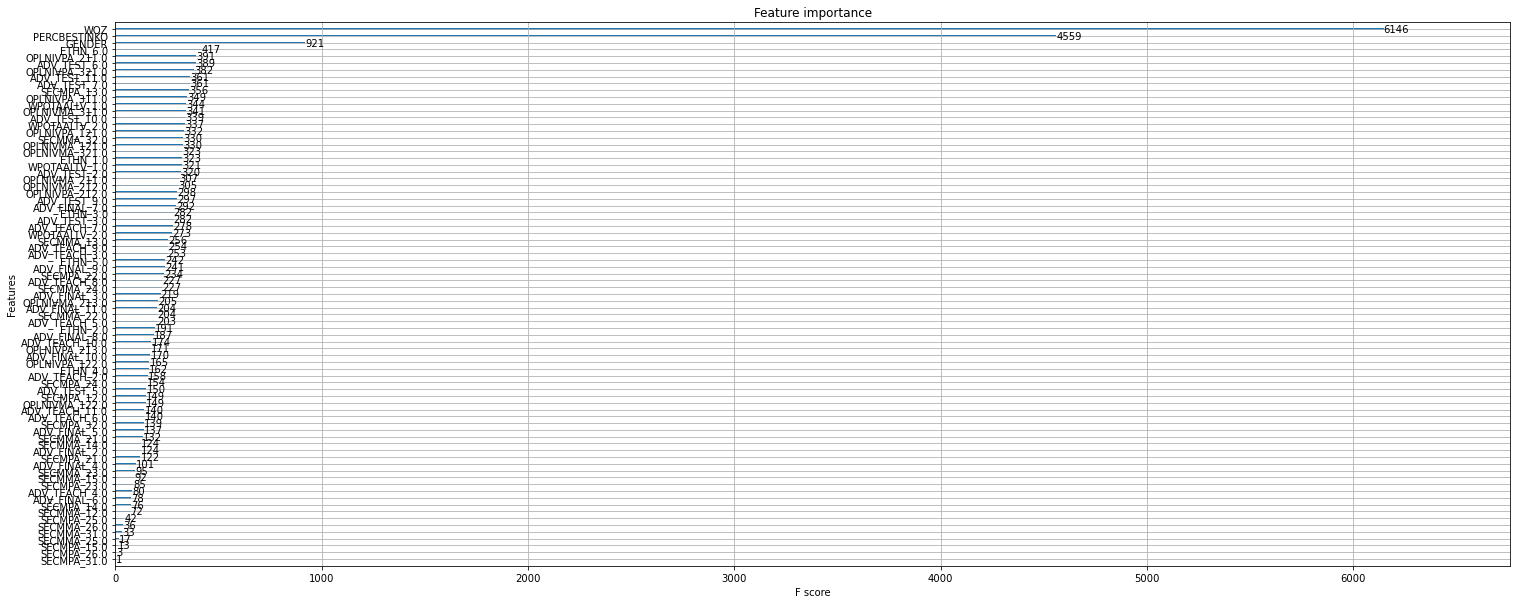

In [73]:
fig = xgb.plot_importance(model)
fig = fig.figure
fig.set_size_inches(25,10)